# Covid-19 Global Visualization

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Upload

In [56]:
death_df=pd.read_csv('time_series_covid19_deaths_global.csv')
confirmed_df=pd.read_csv('time_series_covid19_confirmed_global.csv')
recovered_df=pd.read_csv('time_series_covid19_recovered_global.csv')
country_df=pd.read_csv('cases_country.csv')

# EDA

In [57]:
death_df.shape,confirmed_df.shape,recovered_df.shape,country_df.shape

((264, 99), (264, 99), (250, 99), (185, 14))

In [58]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,30,30,33,36,36,40,42,43,47
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,26,26,27,27,27,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,348,364,367,375,384,392,402,407,415,419
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,33,35,35,36,37,37,37,37,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [59]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25


In [60]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,54,99,112,131,135,150,166,179,188,188
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,277,283,302,314,327,345,356,385,394,403
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,783,846,894,1047,1099,1152,1204,1355,1408,1479
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,169,191,205,235,248,282,309,333,344,344
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,5,6,6,6,6,6,6,6,6


In [61]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-04-26 11:31:19,-25.0000,133.0000,6694,80,5364,1250,26.292533,NaN,NaN,1.195100,36,AUS
1,Austria,2020-04-26 11:30:33,47.5162,14.5501,15225,542,12282,2401,169.046456,NaN,NaN,3.559934,40,AUT
2,Canada,2020-04-26 11:30:54,60.0010,-95.0010,45493,2549,16013,26931,120.174763,NaN,NaN,5.603060,124,CAN
3,China,2020-04-26 06:29:18,30.5928,114.3055,83909,4636,78185,1088,5.973547,NaN,NaN,5.525033,156,CHN
4,Denmark,2020-04-26 11:30:33,56.0000,10.0000,8643,418,5858,2367,149.217836,NaN,NaN,4.836284,208,DNK


In [62]:
sorted_country_df=country_df.sort_values('Confirmed',ascending=False).head(10)

In [63]:
sorted_country_df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
17,US,2020-04-26 11:31:04,40.000000,-100.000000,939249,53934,105818,779497,285.081979,NaN,NaN,5.742247,840,USA
160,Spain,2020-04-26 11:30:33,40.463667,-3.749220,223759,22902,95708,105149,478.579913,NaN,NaN,10.235119,724,ESP
10,Italy,2020-04-26 11:30:33,41.871900,12.567400,195351,26384,63120,105847,323.098071,NaN,NaN,13.505946,380,ITA
6,France,2020-04-26 11:30:33,46.227600,2.213700,161644,22648,45372,93624,247.641034,NaN,NaN,14.011037,250,FRA
7,Germany,2020-04-26 11:30:33,51.165700,10.451500,156513,5877,109800,40836,186.805479,NaN,NaN,3.754960,276,DEU
16,United Kingdom,2020-04-26 11:30:33,55.000000,-3.000000,149569,20381,774,128414,220.323765,NaN,NaN,13.626487,826,GBR
172,Turkey,2020-04-26 11:30:33,38.963700,35.243300,107773,2706,25582,79485,127.785383,NaN,NaN,2.510833,792,TUR
89,Iran,2020-04-26 11:30:33,32.427908,53.688046,90481,5710,69657,15114,107.724514,NaN,NaN,6.310717,364,IRN
3,China,2020-04-26 06:29:18,30.592800,114.305500,83909,4636,78185,1088,5.973547,NaN,NaN,5.525033,156,CHN
13,Russia,2020-04-26 11:30:33,61.524000,105.318800,80949,747,6767,73435,55.469421,NaN,NaN,0.922803,643,RUS


In [64]:
def highlight_col(x):
    r='background-color:red'
    p='background-color:purple'
    g='background-color:grey'
    temp_df=pd.DataFrame('',index=x.index,columns=x.columns)
    temp_df.iloc[:,4]=p
    temp_df.iloc[:,5]=r
    temp_df.iloc[:,6]=g
    return temp_df


In [65]:
sorted_country_df.style.apply(highlight_col,axis=None)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
17,US,2020-04-26 11:31:04,40.000000,-100.000000,939249,53934,105818,779497,285.081979,nan,nan,5.742247,840,USA
160,Spain,2020-04-26 11:30:33,40.463667,-3.749220,223759,22902,95708,105149,478.579913,nan,nan,10.235119,724,ESP
10,Italy,2020-04-26 11:30:33,41.871900,12.567400,195351,26384,63120,105847,323.098071,nan,nan,13.505946,380,ITA
6,France,2020-04-26 11:30:33,46.227600,2.213700,161644,22648,45372,93624,247.641034,nan,nan,14.011037,250,FRA
7,Germany,2020-04-26 11:30:33,51.165700,10.451500,156513,5877,109800,40836,186.805479,nan,nan,3.754960,276,DEU
16,United Kingdom,2020-04-26 11:30:33,55.000000,-3.000000,149569,20381,774,128414,220.323765,nan,nan,13.626487,826,GBR
172,Turkey,2020-04-26 11:30:33,38.963700,35.243300,107773,2706,25582,79485,127.785383,nan,nan,2.510833,792,TUR
89,Iran,2020-04-26 11:30:33,32.427908,53.688046,90481,5710,69657,15114,107.724514,nan,nan,6.310717,364,IRN
3,China,2020-04-26 06:29:18,30.592800,114.305500,83909,4636,78185,1088,5.973547,nan,nan,5.525033,156,CHN
13,Russia,2020-04-26 11:30:33,61.524000,105.318800,80949,747,6767,73435,55.469421,nan,nan,0.922803,643,RUS


In [66]:
import plotly.express as px

# Data Visualization using plotly

In [67]:
fig=px.scatter(sorted_country_df.head(10),x='Country_Region',y='Confirmed',size='Confirmed',color='Country_Region',
              hover_name='Country_Region',size_max=80)

In [68]:
fig.show()

In [69]:
sorted_country_df_recovered=country_df.sort_values('Recovered',ascending=False).head(10)

In [70]:
fig1=px.scatter(sorted_country_df_recovered.head(10),x='Country_Region',y='Recovered',size='Recovered',color='Country_Region',
              hover_name='Country_Region',size_max=80)

In [71]:
fig1.show()

In [72]:
import plotly.graph_objects as go

In [73]:
def plot_cases_country_wise(country):
    labels=['Confirmed','Deaths']
    colors=['cyan','red']
    mode_size=[6,8]
    line_size=[4,5]

    df_list=[confirmed_df,death_df]
    fig=go.Figure()
    for i,df in enumerate(df_list):
        if country=='World' or country=='world':
            x_data=np.array(list(df.iloc[:,5:].columns))
            y_data=np.sum(np.asarray(df.iloc[:,5:]),axis=0)
        else:
            x_data=np.array(list(df.iloc[:,5:].columns))
            y_data=np.sum(np.asarray(df[df['Country/Region']==country].iloc[:,5:]),axis=0)
        
        fig.add_trace(go.Scatter(x=x_data,y=y_data,mode='lines+markers',
                                 name=labels[i],
                                 line=dict(color=colors[i],width=line_size[i]),
                                 connectgaps=True,
                                 text="Total "+ str(labels[i]) + ": " +str(y_data[-1])
                                ))
    fig.show()     

In [74]:
plot_cases_country_wise('India')

# To make interactive

In [75]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [76]:
interact(plot_cases_country_wise, country='world');

interactive(children=(Text(value='world', description='country'), Output()), _dom_classes=('widget-interact',)…

# Plotting on Map using Folium

In [77]:
import folium

In [78]:
world_map=folium.Map(location=[11,0],tiles="cartodbpositron",zoom_start=2,max_zoom=6,min_zoom=2)

In [79]:
for i in range(len(confirmed_df)):
    folium.Circle(location=[confirmed_df.iloc[i]['Lat'],confirmed_df.iloc[i]['Long']],
                  fill=True,
                  radius=(int((np.log(confirmed_df.iloc[i,-1]+1.000001)))+0.2)*50000,
                  fill_color='blue',
                  color='red',
                  tooltip="<div style='margin:0; background-color:black;color:white;'>"+
                  "<h4 style='text-align:center;font-weight:bold'>"+ confirmed_df.iloc[i]['Country/Region']+"</h4>"
                  "<hr style='margin:10px;color:white;'>"+
                  "<ul style='color:white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"
                      "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                      "<li>Deaths:  "+str(death_df.iloc[i,-1])+"</li>"+
                      "<li>Death Rate: "+str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+
                  "</ul></div>"
                  ).add_to(world_map)

In [80]:
world_map

In [81]:
corona_data=pd.read_csv('covid_19_data.csv')

In [82]:
corona_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [83]:
choro_map=px.choropleth(corona_data, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()

# Covid-19 India Visualization

In [84]:
covid_India_cases = pd.read_csv('covid_19_india.csv')
covid_India_cases.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" # in order to have a single root node
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',
                  color='Confirmed', hover_data=['State'],
                  color_continuous_scale='Rainbow')
fig.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [85]:
age_details = pd.read_csv('AgeGroupDetails.csv')

In [86]:
fig = px.pie(age_details, values='TotalCases', names='AgeGroup',title='Confirmed cases of India')
fig.show()

In [87]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

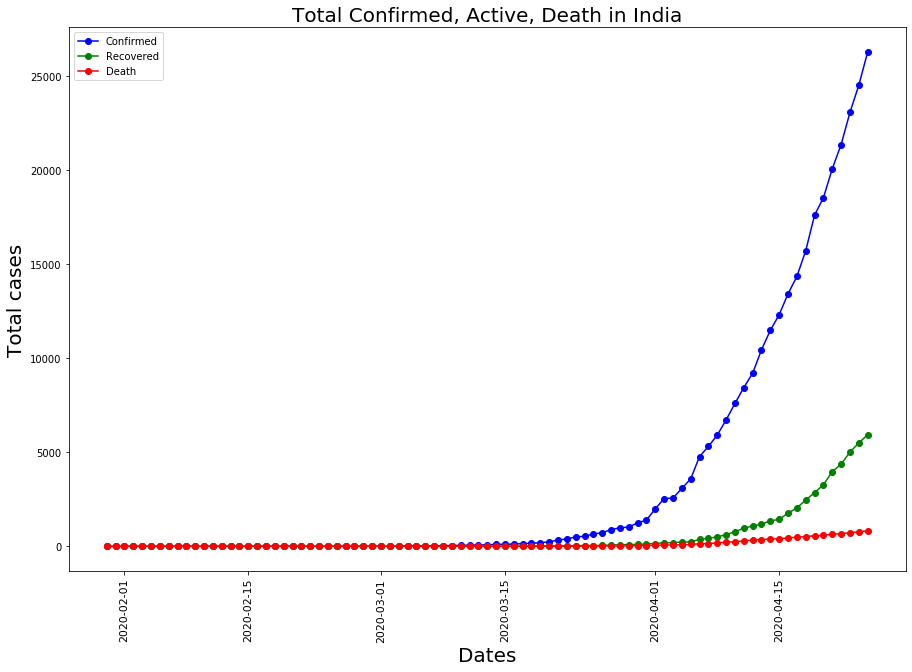

In [88]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = death_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend();

In [89]:
train=pd.read_csv('covid-19-all.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



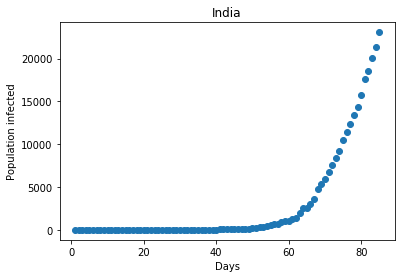

In [90]:
country_df = train[train['Country/Region']=='India'].groupby('Date')['Confirmed','Deaths'].sum()
country_df['day_count'] = list(range(1,len(country_df)+1))
ydata = country_df.Confirmed
xdata = country_df.day_count
country_df['rate'] = (country_df.Confirmed-country_df.Confirmed.shift(1))/country_df.Confirmed
country_df['increase'] = (country_df.Confirmed-country_df.Confirmed.shift(1))

plt.plot(xdata, ydata, 'o')
plt.title("India")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()

In [91]:
covid_India_cases = pd.read_csv('covid_19_india.csv')
covid_India_cases.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
last=statewise_cases
pos=pd.read_csv('UTM ZONES of INDIA.csv')
ind_grp=last.merge(pos , left_on='State', right_on='State / Union Territory')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [92]:
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4,tiles='cartodbpositron')

for lat, lon,state,Confirmed,Recovered,Deaths in zip(ind_grp['Latitude'], ind_grp['Longitude'],ind_grp['State'],ind_grp['Confirmed'],ind_grp['Recovered'],ind_grp['Deaths']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =(
                    'State: ' + str(state) + '<br>'
                    'Confirmed: ' + str(Confirmed) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(map)

In [93]:
map

# Thank You !!!